In [1]:
import gym
import numpy as np
import custom_envs
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng(0)

### Part 1

In [3]:
def test_bernoulli_env(alpha, beta, maxSteps, print_flag=True):
    rng = np.random.default_rng(1)
    env = gym.make('gym:bernoulli-bandit-v0', alpha=alpha, beta=beta, rng=rng)
    rewards = [[] for i in range(env.action_space.n)]
    for i in range(maxSteps):
        action = rng.integers(low=0, high=env.action_space.n)
        s, r, _, _ = env.step(action)
        rewards[action].append(r)
        if print_flag:
            print(action, r)
        env.reset()
    
    print("Action Value Function: ", [np.mean(rewards[i]) for i in range(env.action_space.n)])

In [4]:
test_bernoulli_env(0, 0, 10)

0 0
1 0
1 0
1 0
0 0
1 0
0 0
0 0
1 0
0 0
Action Value Function:  [0.0, 0.0]


In [5]:
test_bernoulli_env(1, 0, 10)

0 1
1 0
1 0
1 0
0 1
1 0
0 1
0 1
1 0
0 1
Action Value Function:  [1.0, 0.0]


In [6]:
test_bernoulli_env(0, 1, 10)

0 0
1 1
1 1
1 1
0 0
1 1
0 0
0 0
1 1
0 0
Action Value Function:  [0.0, 1.0]


In [7]:
test_bernoulli_env(1, 1, 10)

0 1
1 1
1 1
1 1
0 1
1 1
0 1
0 1
1 1
0 1
Action Value Function:  [1.0, 1.0]


In [8]:
test_bernoulli_env(0.5, 0.5, 10)

0 0
1 1
1 1
1 1
0 1
1 0
0 0
0 0
1 0
0 1
Action Value Function:  [0.4, 0.6]


In [9]:
test_bernoulli_env(0.4, 0.3, 1000, False)

Action Value Function:  [0.4109311740890688, 0.2924901185770751]


### Part 2

In [10]:
def test_gaussian_env(std, maxSteps, print_flag=True):
    rng = np.random.default_rng(1)
    means = rng.normal(size=10)
    print("Optimal Action Value q*: ", means)
    env = gym.make('gym:gaussian-bandit-v0', means=means, rng=rng, std=std)
    rewards = [[] for i in range(env.action_space.n)]
    for i in range(maxSteps):
        action = rng.integers(low=0, high=env.action_space.n)
        s, r, _, _ = env.step(action)
        rewards[action].append(r)
        if print_flag:
            print(action, r)
        env.reset()
    
    print("\nAction Value Function: ", [np.mean(rewards[i]) for i in range(env.action_space.n)])
    print("\nstd of rewards: ", [np.std(rewards[i]) for i in range(env.action_space.n)])

In [11]:
test_gaussian_env(0, 30, False)

Optimal Action Value q*:  [ 0.34558419  0.82161814  0.33043708 -1.30315723  0.90535587  0.44637457
 -0.53695324  0.5811181   0.3645724   0.2941325 ]

Action Value Function:  [0.345584192064786, 0.8216181435011584, 0.33043707618338714, -1.303157231604361, 0.9053558666731177, 0.4463745723640113, -0.5369532353602852, 0.581118104196353, 0.36457239618607573, 0.294132496655526]

std of rewards:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1102230246251565e-16, 0.0, 0.0]


In [12]:
test_gaussian_env(0.5, 1000, False)

Optimal Action Value q*:  [ 0.34558419  0.82161814  0.33043708 -1.30315723  0.90535587  0.44637457
 -0.53695324  0.5811181   0.3645724   0.2941325 ]

Action Value Function:  [0.31462494942117536, 0.7926728567728243, 0.27809206410919146, -1.3854882472062233, 0.8243263558203741, 0.41999124926956055, -0.5472460050933649, 0.6173584285240418, 0.33062806606622636, 0.24825834443823813]

std of rewards:  [0.5378539394525087, 0.4735507415381266, 0.5193185949085584, 0.47226382133642153, 0.5128276855861549, 0.5211182627369232, 0.5269213951286262, 0.45396404451690875, 0.49760540082024945, 0.5051933256807356]


In [13]:
test_gaussian_env(1, 1000, False)

Optimal Action Value q*:  [ 0.34558419  0.82161814  0.33043708 -1.30315723  0.90535587  0.44637457
 -0.53695324  0.5811181   0.3645724   0.2941325 ]

Action Value Function:  [0.2836657067775647, 0.7637275700444904, 0.22574705203499582, -1.4678192628080857, 0.74329684496763, 0.39360792617510976, -0.5575387748264446, 0.6535987528517303, 0.296683735946377, 0.20238419222095033]

std of rewards:  [1.0757078789050174, 0.9471014830762532, 1.0386371898171167, 0.9445276426728431, 1.0256553711723095, 1.0422365254738462, 1.0538427902572527, 0.9079280890338175, 0.9952108016404989, 1.0103866513614714]


In [14]:
test_gaussian_env(1, 100000, False)

Optimal Action Value q*:  [ 0.34558419  0.82161814  0.33043708 -1.30315723  0.90535587  0.44637457
 -0.53695324  0.5811181   0.3645724   0.2941325 ]

Action Value Function:  [0.3505333971291451, 0.817643920832559, 0.330617950958992, -1.3040816896569596, 0.9139922137602962, 0.445120352616456, -0.5282691499010002, 0.5724834284660297, 0.36464999856297814, 0.2815253025970728]

std of rewards:  [0.9976335499111704, 0.9816977958381338, 1.0022996660642909, 1.0010339027021005, 0.9981325473680006, 0.998541754200089, 0.9955420897291369, 0.9921797766257098, 1.0048648320994884, 1.0048559153133816]


### Part 3

#### 3(a)

In [15]:
def PureExploitation(env, max_episodes):
    q = np.zeros(env.action_space.n)
    n = np.zeros(env.action_space.n)
    episode = 0
    q_est = np.zeros((max_episodes+1, env.action_space.n+2))
    while episode < max_episodes:
        action = np.argmax(q)
        _, r, _, _ = env.step(action)
        n[action] += 1
        q[action] += (r - q[action]) / n[action]
        episode += 1
        env.reset()
        q_est[episode][:env.action_space.n] = q
        q_est[episode][-2:] = [action, r]
    
    return q_est

In [16]:
bernoulli_bandit = gym.make('gym:bernoulli-bandit-v0', alpha=0.5, beta=0.5, rng=np.random.default_rng(1))
q_est = PureExploitation(
    bernoulli_bandit, 
    max_episodes=10
)
df = pd.DataFrame(q_est, columns=[f'a{i}' for i in range(bernoulli_bandit.action_space.n)]+["action", "reward"])
df

,a0,a1,action,reward
0,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0
3,0.333333,0.0,0.0,1.0
4,0.250000,0.0,0.0,0.0
5,0.400000,0.0,0.0,1.0
6,0.500000,0.0,0.0,1.0
7,0.428571,0.0,0.0,0.0
8,0.500000,0.0,0.0,1.0
9,0.444444,0.0,0.0,0.0


#### 3(b)

In [17]:
def PureExploration(env, max_episodes):
    q = np.zeros(env.action_space.n)
    n = np.zeros(env.action_space.n)
    episode = 0
    q_est = np.zeros((max_episodes+1, env.action_space.n+2))
    while episode < max_episodes:
        action = rng.integers(env.action_space.n)
        _, r, _, _ = env.step(action)
        n[action] += 1
        q[action] += (r - q[action]) / n[action]
        episode += 1
        env.reset()
        q_est[episode][:env.action_space.n] = q
        q_est[episode][-2:] = [action, r]
    
    return q_est

In [18]:
bernoulli_bandit = gym.make('gym:bernoulli-bandit-v0', alpha=0.5, beta=0.5, rng=np.random.default_rng(1))
q_est = PureExploration(
    bernoulli_bandit, 
    max_episodes=10
)
df = pd.DataFrame(q_est, columns=[f'a{i}' for i in range(bernoulli_bandit.action_space.n)]+["action", "reward"])
df

,a0,a1,action,reward
0,0.000000,0.000000,0.0,0.0
1,0.000000,0.000000,1.0,0.0
2,0.000000,0.000000,1.0,0.0
3,0.000000,0.333333,1.0,1.0
4,0.000000,0.333333,0.0,0.0
5,0.500000,0.333333,0.0,1.0
6,0.666667,0.333333,0.0,1.0
7,0.500000,0.333333,0.0,0.0
8,0.600000,0.333333,0.0,1.0
9,0.500000,0.333333,0.0,0.0


In [19]:
bernoulli_bandit = gym.make('gym:bernoulli-bandit-v0', alpha=0.2, beta=0.8, rng=np.random.default_rng(1))
q_est = PureExploration(
    bernoulli_bandit, 
    max_episodes=100
)
df = pd.DataFrame(q_est, columns=[f'a{i}' for i in range(bernoulli_bandit.action_space.n)]+["action", "reward"])
df

,a0,a1,action,reward
0,0.000000,0.000000,0.0,0.0
1,0.000000,1.000000,1.0,1.0
2,0.000000,0.500000,1.0,0.0
3,0.000000,0.666667,1.0,1.0
4,0.000000,0.500000,1.0,0.0
...,...,...,...,...
96,0.146341,0.745455,1.0,1.0
97,0.166667,0.745455,0.0,1.0
98,0.162791,0.745455,0.0,0.0
99,0.162791,0.750000,1.0,1.0


#### 3(c)

In [20]:
def epsilonGreedy(env, max_episodes, epsilon):
    q = np.zeros(env.action_space.n)
    n = np.zeros(env.action_space.n)
    episode = 0
    q_est = np.zeros((max_episodes+1, env.action_space.n+2))
    while episode < max_episodes:
        if rng.random() < epsilon:
            action = rng.integers(env.action_space.n)
        else:
            action = np.argmax(q)
        _, r, _, _ = env.step(action)
        n[action] += 1
        q[action] += (r - q[action]) / n[action]
        episode += 1
        env.reset()
        q_est[episode][:env.action_space.n] = q
        q_est[episode][-2:] = [action, r]
    
    return q_est

In [21]:
bernoulli_bandit = gym.make('gym:bernoulli-bandit-v0', alpha=0.2, beta=0.8, rng=np.random.default_rng(1))
q_est = epsilonGreedy(
    bernoulli_bandit, 
    max_episodes=10,
    epsilon=0
)
df = pd.DataFrame(q_est, columns=[f'a{i}' for i in range(bernoulli_bandit.action_space.n)]+["action", "reward"])
df

,a0,a1,action,reward
0,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0
3,0.333333,0.0,0.0,1.0
4,0.250000,0.0,0.0,0.0
5,0.200000,0.0,0.0,0.0
6,0.166667,0.0,0.0,0.0
7,0.142857,0.0,0.0,0.0
8,0.125000,0.0,0.0,0.0
9,0.111111,0.0,0.0,0.0


In [22]:
bernoulli_bandit = gym.make('gym:bernoulli-bandit-v0', alpha=0.2, beta=0.8, rng=np.random.default_rng(1))
q_est = epsilonGreedy(
    bernoulli_bandit, 
    max_episodes=1000,
    epsilon=1
)
df = pd.DataFrame(q_est, columns=[f'a{i}' for i in range(bernoulli_bandit.action_space.n)]+["action", "reward"])
df

,a0,a1,action,reward
0,0.000000,0.000000,0.0,0.0
1,0.000000,1.000000,1.0,1.0
2,0.000000,1.000000,0.0,0.0
3,0.000000,1.000000,1.0,1.0
4,0.000000,1.000000,0.0,0.0
...,...,...,...,...
996,0.175105,0.791188,0.0,0.0
997,0.174737,0.791188,0.0,0.0
998,0.174737,0.791587,1.0,1.0
999,0.174737,0.790076,1.0,0.0


#### 3(d)

In [23]:
def linearDecay(initial, final, episode, max_episodes):
    if max_episodes == 1:
        return 1
    return initial + ((final - initial) / (max_episodes - 1)) * episode

def exponentialDecay(initial, final, episode, max_episodes):
    # initial* e^-k(max_episodes) = final
    # initial * e^-kx = initial * (final/ initial) ^ (x/max_episodes)

    if max_episodes == 1:
        return 1
    return np.power(final, episode / (max_episodes - 1))

In [24]:
def decayingEpsilonGreedy(env, max_episodes, finalEpsilon, decayType=None):

    q = np.zeros(env.action_space.n)
    n = np.zeros(env.action_space.n)
    episode = 0
    q_est = np.zeros((max_episodes+1, env.action_space.n+3))
    while episode < max_episodes:
        if decayType == "linear":
            epsilon = linearDecay(1, finalEpsilon, episode, max_episodes)
        elif decayType == "exponential":
            epsilon = exponentialDecay(1, finalEpsilon, episode, max_episodes)
        else:
            epsilon = finalEpsilon
        if rng.random() < epsilon:
            action = rng.integers(env.action_space.n)
        else:
            action = np.argmax(q)
        _, r, _, _ = env.step(action)
        n[action] += 1
        q[action] += (r - q[action]) / n[action]
        episode += 1
        env.reset()
        q_est[episode][:env.action_space.n] = q
        q_est[episode][-3:] = [action, r, epsilon]
    
    return q_est

In [25]:
bernoulli_bandit = gym.make('gym:bernoulli-bandit-v0', alpha=0.2, beta=0.8, rng=np.random.default_rng(1))
q_est = decayingEpsilonGreedy(
    bernoulli_bandit, 
    max_episodes=10,
    finalEpsilon=0,
    decayType="linear"
)
df = pd.DataFrame(q_est, columns=[f'a{i}' for i in range(bernoulli_bandit.action_space.n)]+["action", "reward", "epsilon"])
df

,a0,a1,action,reward,epsilon
0,0.000000,0.0,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.0,1.000000
2,0.000000,0.0,0.0,0.0,0.888889
3,0.333333,0.0,0.0,1.0,0.777778
4,0.333333,0.0,1.0,0.0,0.666667
5,0.250000,0.0,0.0,0.0,0.555556
6,0.200000,0.0,0.0,0.0,0.444444
7,0.166667,0.0,0.0,0.0,0.333333
8,0.142857,0.0,0.0,0.0,0.222222
9,0.125000,0.0,0.0,0.0,0.111111


#### 3(e)

In [26]:
def Softmax(env, max_episodes, initialTemp, finalTemp, decayType=None):

    def softmax(x):
        return np.exp(x) / np.sum(np.exp(x))

    q = np.zeros(env.action_space.n)
    n = np.zeros(env.action_space.n)
    episode = 0
    q_est = np.zeros((max_episodes+1, env.action_space.n+3))
    while episode < max_episodes:
        if decayType == "linear":
            temperature = linearDecay(initialTemp, finalTemp, episode, max_episodes)
        elif decayType == "exponential":
            temperature = exponentialDecay(initialTemp, finalTemp, episode, max_episodes)
        else:
            temperature = initialTemp
        probs = softmax(q / temperature)
        action = rng.choice(env.action_space.n, size=1, p=probs)[0]
        _, r, _, _ = env.step(action)
        n[action] += 1
        q[action] += (r - q[action]) / n[action]
        episode += 1
        env.reset()
        q_est[episode][:env.action_space.n] = q
        q_est[episode][-3:] = [action, r, temperature]
    
    return q_est

In [27]:
bernoulli_bandit = gym.make('gym:bernoulli-bandit-v0', alpha=0.2, beta=0.8, rng=np.random.default_rng(1))
q_est = Softmax(
    bernoulli_bandit, 
    max_episodes=100,
    initialTemp=100,
    finalTemp=0.01,
    decayType="exponential"
)
df = pd.DataFrame(q_est, columns=[f'a{i}' for i in range(bernoulli_bandit.action_space.n)]+["action", "reward", "temperature"])
df

,a0,a1,action,reward,temperature
0,0.000000,0.000000,0.0,0.0,0.000000
1,0.000000,0.000000,0.0,0.0,1.000000
2,0.000000,0.000000,0.0,0.0,0.954548
3,0.333333,0.000000,0.0,1.0,0.911163
4,0.250000,0.000000,0.0,0.0,0.869749
...,...,...,...,...,...
96,0.125000,0.761364,1.0,1.0,0.012045
97,0.125000,0.764045,1.0,1.0,0.011498
98,0.125000,0.766667,1.0,1.0,0.010975
99,0.125000,0.769231,1.0,1.0,0.010476


#### 3(f)

In [28]:
def UCB(env, max_episodes, c):
    q = np.zeros(env.action_space.n)
    n = np.zeros(env.action_space.n)
    episode = 0
    q_est = np.zeros((max_episodes+1, env.action_space.n+2))
    while episode < max_episodes:
        if episode < env.action_space.n:
            action = episode
        else:
            u = c * np.sqrt(np.log(episode) / n)
            action = np.argmax(q + u)
        _, r, _, _ = env.step(action)
        n[action] += 1
        q[action] += (r - q[action]) / n[action]
        episode += 1
        env.reset()
        q_est[episode][:env.action_space.n] = q
        q_est[episode][-2:] = [action, r]
    
    return q_est

In [29]:
bernoulli_bandit = gym.make('gym:bernoulli-bandit-v0', alpha=0.2, beta=0.8, rng=np.random.default_rng(1))
q_est = UCB(
    bernoulli_bandit, 
    max_episodes=100,
    c=0.2
)
df = pd.DataFrame(q_est, columns=[f'a{i}' for i in range(bernoulli_bandit.action_space.n)]+["action", "reward"])
df

,a0,a1,action,reward
0,0.000000,0.000000,0.0,0.0
1,0.000000,0.000000,0.0,0.0
2,0.000000,0.000000,1.0,0.0
3,0.500000,0.000000,0.0,1.0
4,0.333333,0.000000,0.0,0.0
...,...,...,...,...
96,0.142857,0.764045,1.0,1.0
97,0.142857,0.766667,1.0,1.0
98,0.142857,0.769231,1.0,1.0
99,0.142857,0.771739,1.0,1.0


### Part 4

##### Hyperparameter Optimization for Bernoulli Bandit

epsilon Greedy

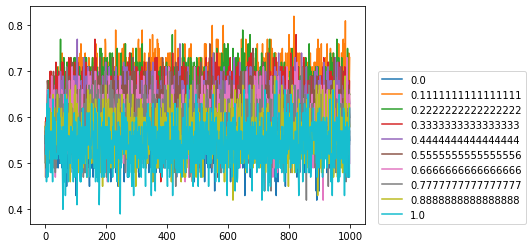

In [30]:
rewards = np.zeros((10, 100, 1000))
eps = np.linspace(0, 1, 10)
for i in range(10):
    for j in range(100):
        rng = np.random.default_rng(j+1)
        env = gym.make('gym:bernoulli-bandit-v0', alpha=rng.random(), beta=rng.random(), rng=rng)
        rewards[i][j] = epsilonGreedy(env, 1000, eps[i])[1:, env.action_space.n+1]
    avg = np.mean(rewards[i], axis=0)
    plt.plot(avg, label=eps[i])
plt.legend(loc=(1.04,0))
plt.show()

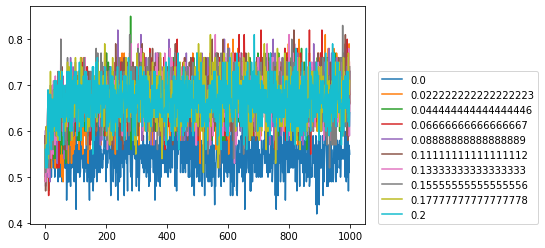

In [31]:
rewards = np.zeros((10, 100, 1000))
eps = np.linspace(0, 0.2, 10)
for i in range(10):
    for j in range(100):
        rng = np.random.default_rng(j+1)
        env = gym.make('gym:bernoulli-bandit-v0', alpha=rng.random(), beta=rng.random(), rng=rng)
        rewards[i][j] = epsilonGreedy(env, 1000, eps[i])[1:, env.action_space.n+1]
    avg = np.mean(rewards[i], axis=0)
    plt.plot(avg, label=eps[i])
plt.legend(loc=(1.04,0))
plt.show()

decaying epsilon Greedy

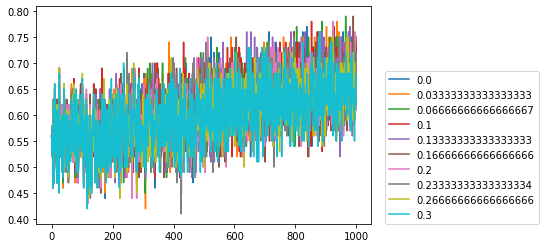

In [32]:
rewards = np.zeros((10, 100, 1000))
eps = np.linspace(0, 0.3, 10)
for i in range(10):
    for j in range(100):
        rng = np.random.default_rng(j+1)
        env = gym.make('gym:bernoulli-bandit-v0', alpha=rng.random(), beta=rng.random(), rng=rng)
        rewards[i][j] = decayingEpsilonGreedy(env, 1000, eps[i], "linear")[1:, env.action_space.n+1]
    avg = np.mean(rewards[i], axis=0)
    plt.plot(avg, label=eps[i])
plt.legend(loc=(1.04,0))
plt.show()

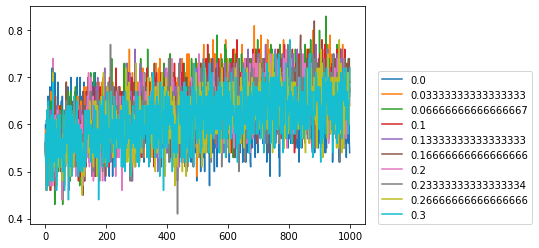

In [33]:
rewards = np.zeros((10, 100, 1000))
eps = np.linspace(0, 0.3, 10)
for i in range(10):
    for j in range(100):
        rng = np.random.default_rng(j+1)
        env = gym.make('gym:bernoulli-bandit-v0', alpha=rng.random(), beta=rng.random(), rng=rng)
        rewards[i][j] = decayingEpsilonGreedy(env, 1000, eps[i], "exponential")[1:, env.action_space.n+1]
    avg = np.mean(rewards[i], axis=0)
    plt.plot(avg, label=eps[i])
plt.legend(loc=(1.04,0))
plt.show()

Softmax

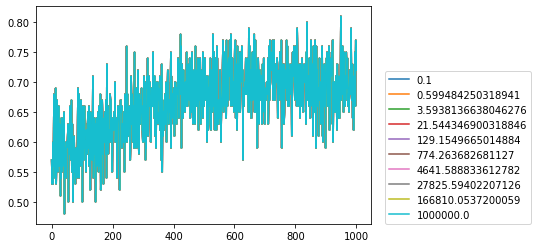

In [34]:
rewards = np.zeros((10, 100, 1000))
initialTemp = 10**np.linspace(-1, 6, 10)
for i in range(10):
    for j in range(100):
        rng = np.random.default_rng(j+1)
        env = gym.make('gym:bernoulli-bandit-v0', alpha=rng.random(), beta=rng.random(), rng=rng)
        rewards[i][j] = Softmax(env, 1000, initialTemp[i], 0.01, "exponential")[1:, env.action_space.n+1]
    avg = np.mean(rewards[i], axis=0)
    plt.plot(avg, label=initialTemp[i])
plt.legend(loc=(1.04,0))
plt.show()

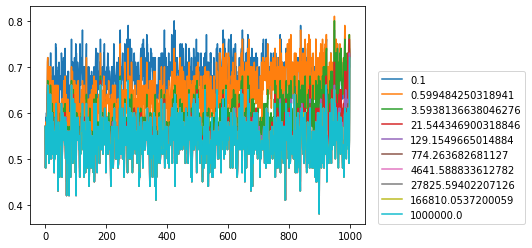

In [35]:
rewards = np.zeros((10, 100, 1000))
initialTemp = 10**np.linspace(-1, 6, 10)
for i in range(10):
    for j in range(100):
        rng = np.random.default_rng(j+1)
        env = gym.make('gym:bernoulli-bandit-v0', alpha=rng.random(), beta=rng.random(), rng=rng)
        rewards[i][j] = Softmax(env, 1000, initialTemp[i], 0.01, "linear")[1:, env.action_space.n+1]
    avg = np.mean(rewards[i], axis=0)
    plt.plot(avg, label=initialTemp[i])
plt.legend(loc=(1.04,0))
plt.show()

UCB

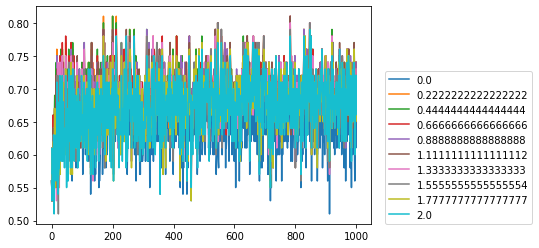

In [36]:
rewards = np.zeros((10, 100, 1000))
c = np.linspace(0, 2, 10)
for i in range(10):
    for j in range(100):
        rng = np.random.default_rng(j+1)
        env = gym.make('gym:bernoulli-bandit-v0', alpha=rng.random(), beta=rng.random(), rng=rng)
        rewards[i][j] = UCB(env, 1000, c[i])[1:, env.action_space.n+1]
    avg = np.mean(rewards[i], axis=0)
    plt.plot(avg, label=c[i])
plt.legend(loc=(1.04,0))
plt.show()

##### Hyperparameter Optimization for GaussianBandit

epsilon Greedy

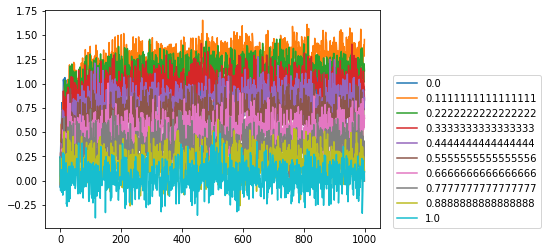

In [37]:
rewards = np.zeros((10, 100, 1000))
eps = np.linspace(0, 1, 10)
for i in range(10):
    for j in range(100):
        rng = np.random.default_rng(j+1)
        env = gym.make('gym:gaussian-bandit-v0', means=rng.normal(size=10), rng=rng)
        rewards[i][j] = epsilonGreedy(env, 1000, eps[i])[1:, env.action_space.n+1]
    avg = np.mean(rewards[i], axis=0)
    plt.plot(avg, label=eps[i])
plt.legend(loc=(1.04,0))
plt.show()

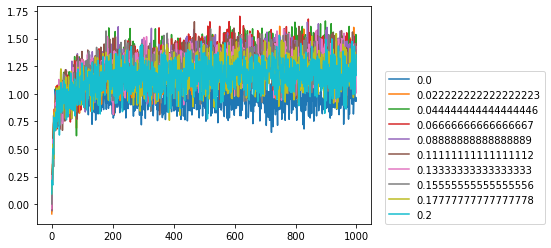

In [38]:
rewards = np.zeros((10, 100, 1000))
eps = np.linspace(0, 0.2, 10)
for i in range(10):
    for j in range(100):
        rng = np.random.default_rng(j+1)
        env = gym.make('gym:gaussian-bandit-v0', means=rng.normal(size=10), rng=rng)
        rewards[i][j] = epsilonGreedy(env, 1000, eps[i])[1:, env.action_space.n+1]
    avg = np.mean(rewards[i], axis=0)
    plt.plot(avg, label=eps[i])
plt.legend(loc=(1.04,0))
plt.show()

decaying epsilon Greedy

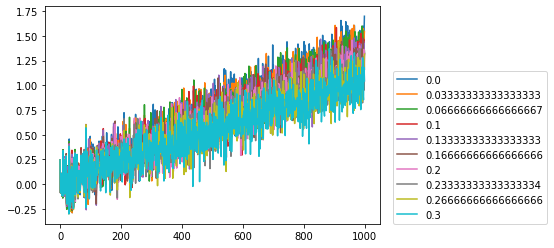

In [39]:
rewards = np.zeros((10, 100, 1000))
eps = np.linspace(0, 0.3, 10)
for i in range(10):
    for j in range(100):
        rng = np.random.default_rng(j+1)
        env = gym.make('gym:gaussian-bandit-v0', means=rng.normal(size=10), rng=rng)
        rewards[i][j] = decayingEpsilonGreedy(env, 1000, eps[i], "linear")[1:, env.action_space.n+1]
    avg = np.mean(rewards[i], axis=0)
    plt.plot(avg, label=eps[i])
plt.legend(loc=(1.04,0))
plt.show()

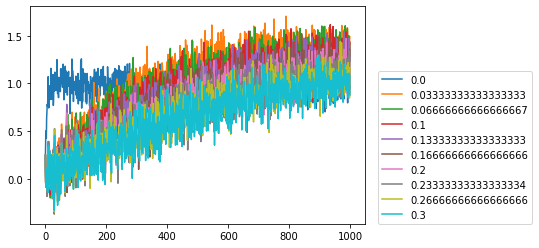

In [40]:
rewards = np.zeros((10, 100, 1000))
eps = np.linspace(0, 0.3, 10)
for i in range(10):
    for j in range(100):
        rng = np.random.default_rng(j+1)
        env = gym.make('gym:gaussian-bandit-v0', means=rng.normal(size=10), rng=rng)
        rewards[i][j] = decayingEpsilonGreedy(env, 1000, eps[i], "exponential")[1:, env.action_space.n+1]
    avg = np.mean(rewards[i], axis=0)
    plt.plot(avg, label=eps[i])
plt.legend(loc=(1.04,0))
plt.show()

Softmax

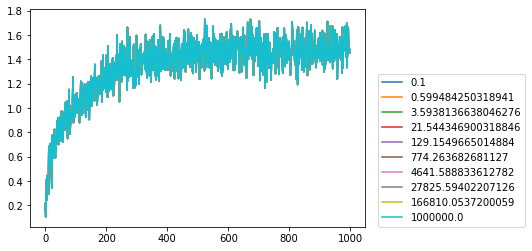

In [41]:
rewards = np.zeros((10, 100, 1000))
initialTemp = 10**np.linspace(-1, 6, 10)
for i in range(10):
    for j in range(100):
        rng = np.random.default_rng(j+1)
        env = gym.make('gym:gaussian-bandit-v0', means=rng.normal(size=10), rng=rng)
        rewards[i][j] = Softmax(env, 1000, initialTemp[i], 0.01, "exponential")[1:, env.action_space.n+1]
    avg = np.mean(rewards[i], axis=0)
    plt.plot(avg, label=initialTemp[i])
plt.legend(loc=(1.04,0))
plt.show()

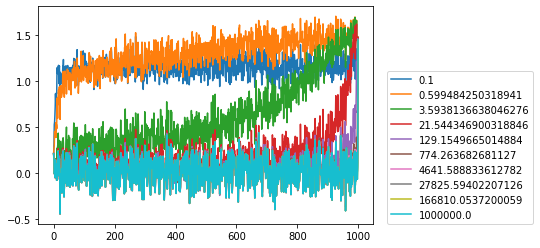

In [42]:
rewards = np.zeros((10, 100, 1000))
initialTemp = 10**np.linspace(-1, 6, 10)
for i in range(10):
    for j in range(100):
        rng = np.random.default_rng(j+1)
        env = gym.make('gym:gaussian-bandit-v0', means=rng.normal(size=10), rng=rng)
        rewards[i][j] = Softmax(env, 1000, initialTemp[i], 0.01, "linear")[1:, env.action_space.n+1]
    avg = np.mean(rewards[i], axis=0)
    plt.plot(avg, label=initialTemp[i])
plt.legend(loc=(1.04,0))
plt.show()

UCB

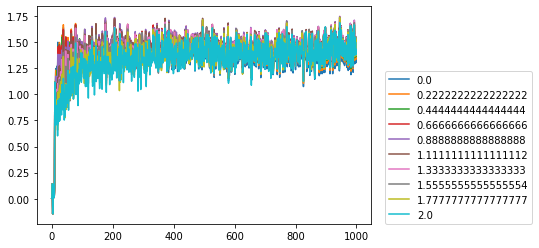

In [43]:
rewards = np.zeros((10, 100, 1000))
c = np.linspace(0, 2, 10)
for i in range(10):
    for j in range(100):
        rng = np.random.default_rng(j+1)
        env = gym.make('gym:gaussian-bandit-v0', means=rng.normal(size=10), rng=rng)
        rewards[i][j] = UCB(env, 1000, c[i])[1:, env.action_space.n+1]
    avg = np.mean(rewards[i], axis=0)
    plt.plot(avg, label=c[i])
plt.legend(loc=(1.04,0))
plt.show()

Average Reward

In [44]:
rewards = np.zeros((50, 6, 1000))
for i in range(50):
    rng = np.random.default_rng(i+1)
    env = gym.make('gym:bernoulli-bandit-v0', alpha=rng.random(), beta=rng.random(), rng=rng)
    rewards[i] = [
        PureExploitation(env, 1000)[1:, env.action_space.n+1],
        PureExploration(env, 1000)[1:, env.action_space.n+1],
        epsilonGreedy(env, 1000, 0.1)[1:, env.action_space.n+1],
        decayingEpsilonGreedy(env, 1000, 0.1, "exponential")[1:, env.action_space.n+1],
        Softmax(env, 1000, 0.1, 0.01, "linear")[1:, env.action_space.n+1],
        UCB(env, 1000, 0.6)[1:, env.action_space.n+1]
    ]
    
average_rewards = np.mean(rewards, axis=0)

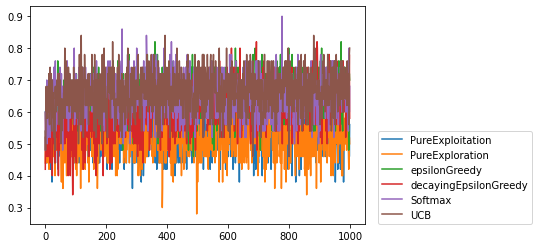

In [45]:
strat = [
    "PureExploitation",
    "PureExploration",
    "epsilonGreedy",
    "decayingEpsilonGreedy",
    "Softmax",
    "UCB"
]
for i in range(6):
    plt.plot(np.arange(1000), average_rewards[i], label=strat[i])
plt.legend(loc=(1.04,0))
plt.show()

In [46]:
rewards = np.zeros((50, 6, 1000))
for i in range(50):
    rng = np.random.default_rng(i+1)
    means = rng.normal(size=10)
    env = gym.make('gym:gaussian-bandit-v0', means=means, rng=rng)
    rewards[i] = [
        PureExploitation(env, 1000)[1:, env.action_space.n+1],
        PureExploration(env, 1000)[1:, env.action_space.n+1],
        epsilonGreedy(env, 1000, 0.05)[1:, env.action_space.n+1],
        decayingEpsilonGreedy(env, 1000, 0.03, "exponential")[1:, env.action_space.n+1],
        Softmax(env, 1000, 1, 0.01, "exponential")[1:, env.action_space.n+1],
        UCB(env, 1000, 0.6)[1:, env.action_space.n+1]
    ]
    
average_rewards = np.mean(rewards, axis=0)

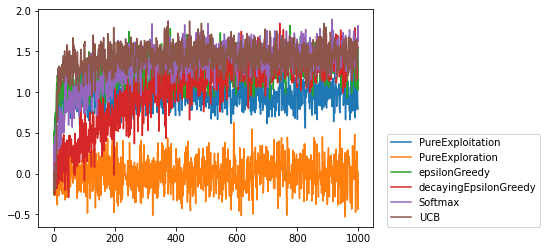

In [47]:
strat = [
    "PureExploitation",
    "PureExploration",
    "epsilonGreedy",
    "decayingEpsilonGreedy",
    "Softmax",
    "UCB"
]
for i in range(6):
    plt.plot(np.arange(1000), average_rewards[i], label=strat[i])
plt.legend(loc=(1.04,0))
plt.show()

Plot similar to Lecture (2000 environments)

In [48]:
rewards = np.zeros((2000, 4, 1000))
for i in range(2000):
    rng = np.random.default_rng(i+1)
    means = rng.normal(size=10)
    env = gym.make('gym:gaussian-bandit-v0', means=means, rng=rng)
    rewards[i] = [
        PureExploitation(env, 1000)[1:, env.action_space.n+1],
        PureExploration(env, 1000)[1:, env.action_space.n+1],
        epsilonGreedy(env, 1000, 0.1)[1:, env.action_space.n+1],
        epsilonGreedy(env, 1000, 0.01)[1:, env.action_space.n+1],
    ]
    
average_rewards = np.mean(rewards, axis=0)

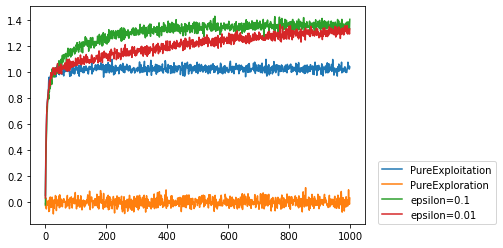

In [49]:
strat = [
    "PureExploitation",
    "PureExploration",
    "epsilon=0.1",
    "epsilon=0.01",
]
for i in range(4):
    plt.plot(np.arange(1000), average_rewards[i], label=strat[i])
plt.legend(loc=(1.04,0))
plt.show()

In [50]:
rewards = np.zeros((50, 6, 1000))
opt_rew = np.zeros(50)
for i in range(50):
    rng = np.random.default_rng(i+1)
    alpha=rng.random()
    beta=rng.random()
    opt_rew[i] = max(alpha, beta)
    env = gym.make('gym:bernoulli-bandit-v0', alpha=alpha, beta=beta, rng=rng)
    rewards[i] = [
        PureExploitation(env, 1000)[1:, env.action_space.n+1],
        PureExploration(env, 1000)[1:, env.action_space.n+1],
        epsilonGreedy(env, 1000, 0.1)[1:, env.action_space.n+1],
        decayingEpsilonGreedy(env, 1000, 0.1, "exponential")[1:, env.action_space.n+1],
        Softmax(env, 1000, 0.1, 0.01, "linear")[1:, env.action_space.n+1],
        UCB(env, 1000, 0.6)[1:, env.action_space.n+1]
    ]

In [51]:
opt_rewards = [i*(np.arange(1000)+1) for i in opt_rew]
opt_rewards = np.array(opt_rewards)
cum_rewards = np.cumsum(rewards, axis=2)
regret = np.zeros((50, 6, 1000))
for i in range(50):
    for j in range(6):
        regret[i][j] = opt_rewards[i] - cum_rewards[i][j]
        
avg_regret =  np.mean(regret, axis=0)

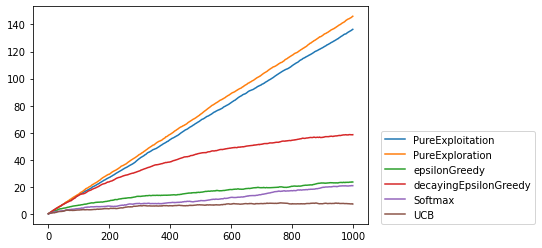

In [52]:
strat = [
    "PureExploitation",
    "PureExploration",
    "epsilonGreedy",
    "decayingEpsilonGreedy",
    "Softmax",
    "UCB"
]
for i in range(6):
    plt.plot(np.arange(1000), avg_regret[i], label=strat[i])
plt.legend(loc=(1.04,0))
plt.show()

In [53]:
rewards = np.zeros((50, 6, 1000))
opt_rew = np.zeros(50)
for i in range(50):
    rng = np.random.default_rng(i+1)
    means = rng.normal(size=10)
    opt_rew[i] = np.max(means)
    env = gym.make('gym:gaussian-bandit-v0', means=means, rng=rng)
    rewards[i] = [
        PureExploitation(env, 1000)[1:, env.action_space.n+1],
        PureExploration(env, 1000)[1:, env.action_space.n+1],
        epsilonGreedy(env, 1000, 0.05)[1:, env.action_space.n+1],
        decayingEpsilonGreedy(env, 1000, 0.03, "exponential")[1:, env.action_space.n+1],
        Softmax(env, 1000, 1, 0.01, "exponential")[1:, env.action_space.n+1],
        UCB(env, 1000, 0.6)[1:, env.action_space.n+1]
    ]

In [54]:
opt_rewards = [i*(np.arange(1000)+1) for i in opt_rew]
opt_rewards = np.array(opt_rewards)
cum_rewards = np.cumsum(rewards, axis=2)
regret = np.zeros((50, 6, 1000))
for i in range(50):
    for j in range(6):
        regret[i][j] = opt_rewards[i] - cum_rewards[i][j]
        
avg_regret =  np.mean(regret, axis=0)

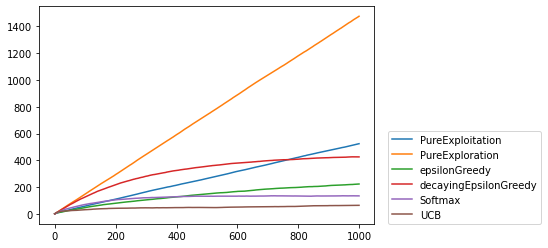

In [55]:
strat = [
    "PureExploitation",
    "PureExploration",
    "epsilonGreedy",
    "decayingEpsilonGreedy",
    "Softmax",
    "UCB"
]
for i in range(6):
    plt.plot(np.arange(1000), avg_regret[i], label=strat[i])
plt.legend(loc=(1.04,0))
plt.show()

In [56]:
actions = np.zeros((50, 6, 1000))
opt_action = np.zeros(50)
for i in range(50):
    rng = np.random.default_rng(i+1)
    alpha=rng.random()
    beta=rng.random()
    opt_action[i] = 1 - int(alpha > beta)
    env = gym.make('gym:bernoulli-bandit-v0', alpha=alpha, beta=beta, rng=rng)
    actions[i] = [
        PureExploitation(env, 1000)[1:, env.action_space.n],
        PureExploration(env, 1000)[1:, env.action_space.n],
        epsilonGreedy(env, 1000, 0.1)[1:, env.action_space.n],
        decayingEpsilonGreedy(env, 1000, 0.1, "exponential")[1:, env.action_space.n],
        Softmax(env, 1000, 0.1, 0.01, "linear")[1:, env.action_space.n],
        UCB(env, 1000, 0.6)[1:, env.action_space.n+1]
    ]

In [57]:
opt_action_flag = np.zeros((50, 6, 1000))
for i in range(50):
    for j in range(6):
        opt_action_flag[i][j] = actions[i][j] == opt_action[i]

In [58]:
opt_action_per = np.sum(opt_action_flag, axis=0) / 50

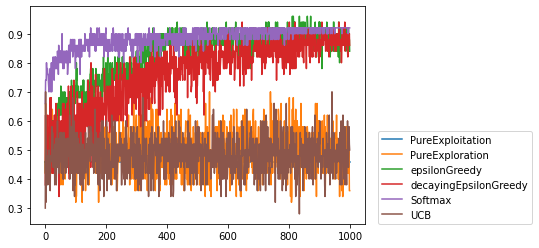

In [59]:
strat = [
    "PureExploitation",
    "PureExploration",
    "epsilonGreedy",
    "decayingEpsilonGreedy",
    "Softmax",
    "UCB"
]
for i in range(6):
    plt.plot(np.arange(1000), opt_action_per[i], label=strat[i])
plt.legend(loc=(1.04,0))
plt.show()

In [60]:
actions = np.zeros((50, 6, 1000))
opt_action = np.zeros(50)
for i in range(50):
    rng = np.random.default_rng(i+1)
    means = rng.normal(size=10)
    opt_action[i] = np.argmax(means)
    env = gym.make('gym:gaussian-bandit-v0', means=means, rng=rng)
    actions[i] = [
        PureExploitation(env, 1000)[1:, env.action_space.n],
        PureExploration(env, 1000)[1:, env.action_space.n],
        epsilonGreedy(env, 1000, 0.05)[1:, env.action_space.n],
        decayingEpsilonGreedy(env, 1000, 0.03, "exponential")[1:, env.action_space.n],
        Softmax(env, 1000, 1, 0.01, "linear")[1:, env.action_space.n],
        UCB(env, 1000, 0.6)[1:, env.action_space.n+1]
    ]

In [61]:
opt_action_flag = np.zeros((50, 6, 1000))
for i in range(50):
    for j in range(6):
        opt_action_flag[i][j] = actions[i][j] == opt_action[i]
opt_action_per = np.sum(opt_action_flag, axis=0) / 50

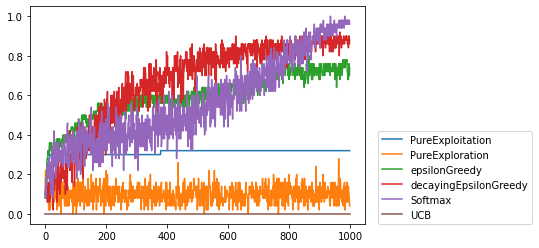

In [62]:
strat = [
    "PureExploitation",
    "PureExploration",
    "epsilonGreedy",
    "decayingEpsilonGreedy",
    "Softmax",
    "UCB"
]
for i in range(6):
    plt.plot(np.arange(1000), opt_action_per[i], label=strat[i])
plt.legend(loc=(1.04,0))
plt.show()